<a href="https://colab.research.google.com/github/arol9204/arol9204/blob/main/Hello_AlexNet_Traffic_signs_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Future Mobility CHallenge
## Deep Learning and Computer Vision for Autonomous Vehicles (Avs)

# CODE TO CLASSIFY TRAFFIC SIGNS

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



- ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
- ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
- ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
- ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection') (12, b'Priority road')
- (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
- (18, b'General caution') (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') (21, b'Double curve')
- (22, b'Bumpy road') (23, b'Slippery road')
- (24, b'Road narrows on the right') (25, b'Road work')
- (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
- (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
- (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
- (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
- (40, b'Roundabout mandatory') (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')


## 1. Research AlexNet Convolutional Neural Network, draw the network architecture, and indicate the use of each of the layers such as convolution/feature extraction, max pooling, and flattening layers.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import libraries 
import pickle
import tensorflow as tf
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

with open("/content/drive/MyDrive/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

## 2. Visualize a sample image from each class in the dataset. Display the corresponding label and perform a sanity check.

In [63]:
np.nonzero(y_train == 10)[0][0]

12

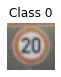

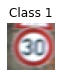

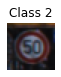

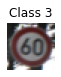

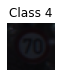

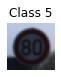

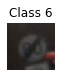

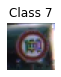

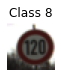

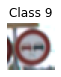

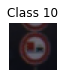

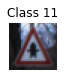

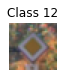

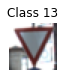

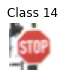

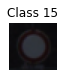

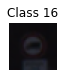

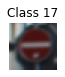

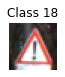

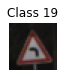

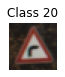

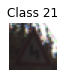

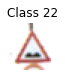

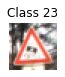

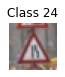

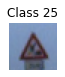

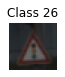

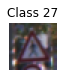

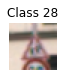

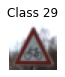

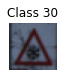

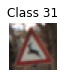

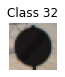

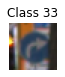

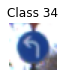

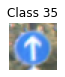

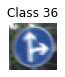

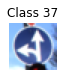

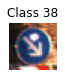

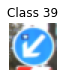

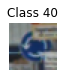

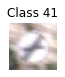

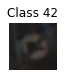

In [119]:
# i = 1001
# plt.imshow(X_train[i]) # Show images are not shuffled
# y_train[i]

for i in range(0,43):
    # plt.figure(figsize=(5, 5))
    # plt.subplot(5, 10, i+1)
    # index = np.nonzero(y_train == i)[0][0]
    # plt.imshow(X_train[index])
    # plt.title("Class {}".format(y_train[index]))
    # plt.tight_layout()

    index = np.nonzero(y_train == i)[0][0]
    image = X_train[index]
    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(5, 10, (i%10)+1 )
    plt.title("Class {}".format(y_train[index]))
    plt.imshow(image)
    plt.axis('off')

# DATA PEPARATION

In [10]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [11]:
# Splitting the dataset in trining, validation and testing
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [12]:
# Normalizing the values
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [13]:
# Shape of the training dataset
X_train_gray.shape

(34799, 32, 32, 1)

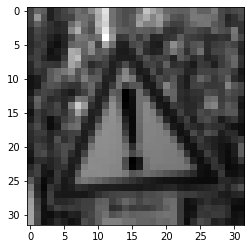

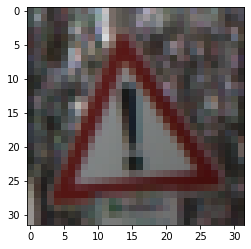

In [14]:
# Visualizig one signal in the training data and the label
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


## MODEL TRAINING

In [15]:
# Import train_test_split from scikit library
# Import Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split


In [16]:
image_shape = X_train_gray[i].shape

In [17]:
X_train_gray[i].shape

(32, 32, 1)

### Baseline model

In [18]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(43, activation = 'sigmoid'))


In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics =['accuracy'])

In [ ]:
import time

start_time = time.time()

history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/50
70/70 [==============================] - 5s 48ms/step - loss: 3.4415 - accuracy: 0.1112 - val_loss: 3.3631 - val_accuracy: 0.1442
Epoch 2/50
70/70 [==============================] - 2s 34ms/step - loss: 2.9572 - accuracy: 0.2467 - val_loss: 2.9555 - val_accuracy: 0.2444
Epoch 3/50
70/70 [==============================] - 2s 35ms/step - loss: 2.3916 - accuracy: 0.3815 - val_loss: 2.4916 - val_accuracy: 0.3474
Epoch 4/50
70/70 [==============================] - 4s 54ms/step - loss: 1.9608 - accuracy: 0.4770 - val_loss: 2.1612 - val_accuracy: 0.4102
Epoch 5/50
70/70 [==============================] - 3s 43ms/step - loss: 1.6689 - accuracy: 0.5458 - val_loss: 1.9562 - val_accuracy: 0.4712
Epoch 6/50
70/70 [==============================] - 2s 34ms/step - loss: 1.4657 - accuracy: 0.5968 - val_loss: 1.7940 - val_accuracy: 0.5032
Epoch 7/50
70/70 [==============================] - 2s 35ms/step - loss: 1.3116 - accuracy: 0.6399 - val_loss: 1.6619 - val_accuracy: 0.5268
Epoch 8/50
70

In [ ]:
# Evaluating the performance in the testing dataset
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7480


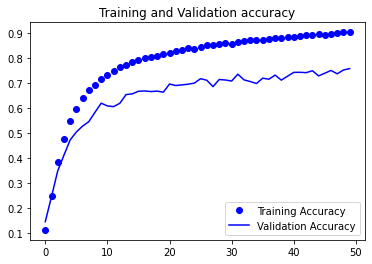

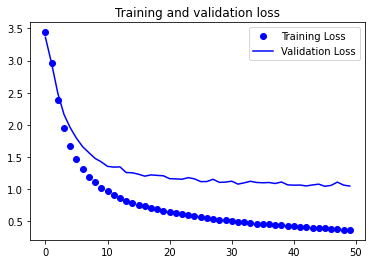

In [ ]:
# Plotting the result of accuracy in the training and validation datasets
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#get the predictions for the test data
predict_x = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test


395/395 [==============================] - 1s 2ms/step


In [ ]:
# Creating a confusion matrix to explore the errors and good predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 17,  25,   4, ...,   0,   0,   0],
       [114, 482,  55, ...,   4,   0,   0],
       [ 93, 108, 473, ...,   4,   0,   0],
       ...,
       [ 15,   3,  15, ...,  30,   0,   0],
       [  0,   0,   1, ...,   0,  10,   0],
       [  0,   0,   0, ...,   0,  21,  43]])

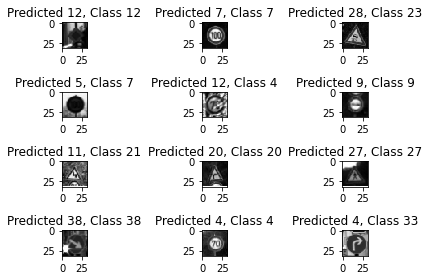

In [ ]:
# Ploting the first "n" images with predicted and real label
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

## 3. Train a CNN based on AlexNet to classify traffic signs. Train the model using 15 epochs and plot the network accuracy vs. the number of epochs.  

### AlexNet Model

In [37]:

alexnet = Sequential()

alexnet.add(Conv2D(96, (11,11), strides=4, activation='relu', input_shape=image_shape))
alexnet.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))

alexnet.add(Conv2D(256, (5,5), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))

alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(43, activation='softmax'))

In [38]:
alexnet.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 6, 6, 96)          11712     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 3, 3, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 3, 3, 256)         614656    
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_58 (Conv2D)          (None, 2, 2, 384)       

In [39]:
alexnet.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [42]:
start_time = time.time()

history1 = alexnet.fit(X_train_gray_norm, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/15
272/272 [==============================] - 421s 2s/step - loss: 2.8850 - accuracy: 0.1498 - val_loss: 2.5153 - val_accuracy: 0.2637
Epoch 2/15
272/272 [==============================] - 417s 2s/step - loss: 1.8909 - accuracy: 0.3881 - val_loss: 1.8142 - val_accuracy: 0.4349
Epoch 3/15
272/272 [==============================] - 426s 2s/step - loss: 1.2688 - accuracy: 0.5739 - val_loss: 1.3690 - val_accuracy: 0.5841
Epoch 4/15
272/272 [==============================] - 420s 2s/step - loss: 0.9067 - accuracy: 0.6955 - val_loss: 1.2049 - val_accuracy: 0.6417
Epoch 5/15
272/272 [==============================] - 439s 2s/step - loss: 0.6593 - accuracy: 0.7814 - val_loss: 1.2068 - val_accuracy: 0.6889
Epoch 6/15
272/272 [==============================] - 424s 2s/step - loss: 0.5350 - accuracy: 0.8225 - val_loss: 1.0847 - val_accuracy: 0.7057
Epoch 7/15
272/272 [==============================] - 426s 2s/step - loss: 0.4563 - accuracy: 0.8512 - val_loss: 1.0121 - val_accuracy: 0.7385

## 4. Test the trained CNN and evaluate its performance on the testing (holdout) dataset. Note that the testing dataset has never been seen by the model during training.  

In [44]:
# Evaluating the model using the testing dataset
score = alexnet.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7842


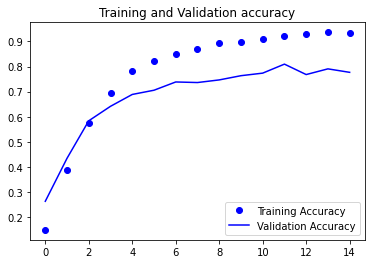

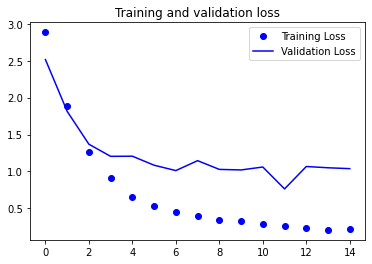

In [45]:
# Plotting the result of accuracy in the training and validation datasets
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 5. Fine-tune the trained model by training it on additional datasets. Feel free to collect data from the internet or using a mobile device

## 6. Explore 3 different ways to improve the network accuracy such as increasing the number of epochs, adding additional convolutional/max-pooling layers, or adding dropout layers. Retrain the network and display the results. Any reasonable answer should be sufficient.

In [52]:
alexnet1 = Sequential()

alexnet1.add(Conv2D(64, (11,11), strides=4, activation='relu', input_shape=image_shape))
alexnet1.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))
alexnet1.add(Dropout(0.5))

alexnet1.add(Conv2D(128, (5,5), padding='same', activation='relu'))
alexnet1.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))
alexnet1.add(Dropout(0.5))

alexnet1.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet1.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet1.add(Conv2D(128, (3,3), padding='same', activation='relu'))
alexnet1.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))
alexnet1.add(Dropout(0.3))

alexnet1.add(Flatten())
alexnet1.add(Dense(512, activation='relu'))
alexnet1.add(Dropout(0.3))

alexnet1.add(Dense(512, activation='relu'))
alexnet1.add(Dropout(0.3))
alexnet1.add(Dense(43, activation='softmax'))

In [53]:
alexnet1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 6, 6, 64)          7808      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 3, 3, 64)          0         
                                                                 
 conv2d_71 (Conv2D)          (None, 3, 3, 128)         204928    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 2, 2, 128)       

In [54]:
alexnet1.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [55]:
start_time = time.time()

history2 = alexnet1.fit(X_train_gray_norm, y_train,
          batch_size=256,
          epochs=15,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/15
136/136 [==============================] - 108s 787ms/step - loss: 3.3109 - accuracy: 0.0924 - val_loss: 3.0756 - val_accuracy: 0.1531
Epoch 2/15
136/136 [==============================] - 105s 772ms/step - loss: 2.6794 - accuracy: 0.2090 - val_loss: 2.2816 - val_accuracy: 0.3054
Epoch 3/15
136/136 [==============================] - 105s 772ms/step - loss: 2.2242 - accuracy: 0.3227 - val_loss: 1.9719 - val_accuracy: 0.3864
Epoch 4/15
136/136 [==============================] - 106s 776ms/step - loss: 1.9380 - accuracy: 0.4016 - val_loss: 1.6701 - val_accuracy: 0.4549
Epoch 5/15
136/136 [==============================] - 105s 769ms/step - loss: 1.7580 - accuracy: 0.4580 - val_loss: 1.4995 - val_accuracy: 0.5204
Epoch 6/15
136/136 [==============================] - 106s 781ms/step - loss: 1.6077 - accuracy: 0.5022 - val_loss: 1.4804 - val_accuracy: 0.5331
Epoch 7/15
136/136 [==============================] - 104s 768ms/step - loss: 1.4582 - accuracy: 0.5502 - val_loss: 1.2820 -

## 7. Build 3 different deep convolutional neural networks with various architectures. Feel free to choose the number of layers, number of kernels (feature detectors), number of dense (Fully-connected) layers, number of neurons in the dense layer, activation functions, regularization such as dropout, etc. Retrain the network and plot the results.

### GoogLeNet

### ResNet

### Other architectural structure

In [124]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [125]:
# Explore the structure of the NN
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_82 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_83 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_84 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

In [126]:
# Compile metrics

model.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [127]:
start_time = time.time()

history1 = model.fit(X_train_gray_norm, y_train,
          batch_size=500,
          epochs=15,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/15
70/70 [==============================] - 113s 2s/step - loss: 3.4200 - accuracy: 0.0837 - val_loss: 3.2403 - val_accuracy: 0.1388
Epoch 2/15
70/70 [==============================] - 111s 2s/step - loss: 2.0413 - accuracy: 0.4165 - val_loss: 1.0195 - val_accuracy: 0.7048
Epoch 3/15
70/70 [==============================] - 113s 2s/step - loss: 0.7921 - accuracy: 0.7511 - val_loss: 0.4412 - val_accuracy: 0.8592
Epoch 4/15
70/70 [==============================] - 114s 2s/step - loss: 0.4317 - accuracy: 0.8638 - val_loss: 0.2709 - val_accuracy: 0.9184
Epoch 5/15
70/70 [==============================] - 112s 2s/step - loss: 0.2849 - accuracy: 0.9115 - val_loss: 0.2096 - val_accuracy: 0.9347
Epoch 6/15
70/70 [==============================] - 113s 2s/step - loss: 0.2082 - accuracy: 0.9333 - val_loss: 0.1711 - val_accuracy: 0.9537
Epoch 7/15
70/70 [==============================] - 112s 2s/step - loss: 0.1586 - accuracy: 0.9513 - val_loss: 0.1366 - val_accuracy: 0.9626
Epoch 8/15
70

In [128]:
score = model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9610


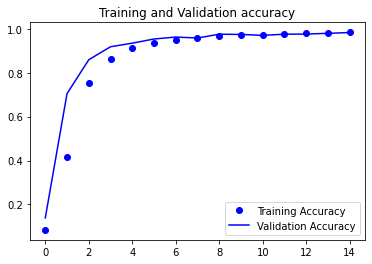

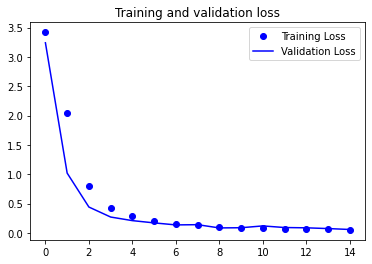

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [130]:
# New way:
predict_x = model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test

395/395 [==============================] - 11s 27ms/step


In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 712,   0, ...,   0,   0,   0],
       [  0,   9, 740, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  85,   0,   0],
       [  0,   0,   0, ...,   0,  42,   0],
       [  0,   0,   0, ...,   0,   0,  87]])

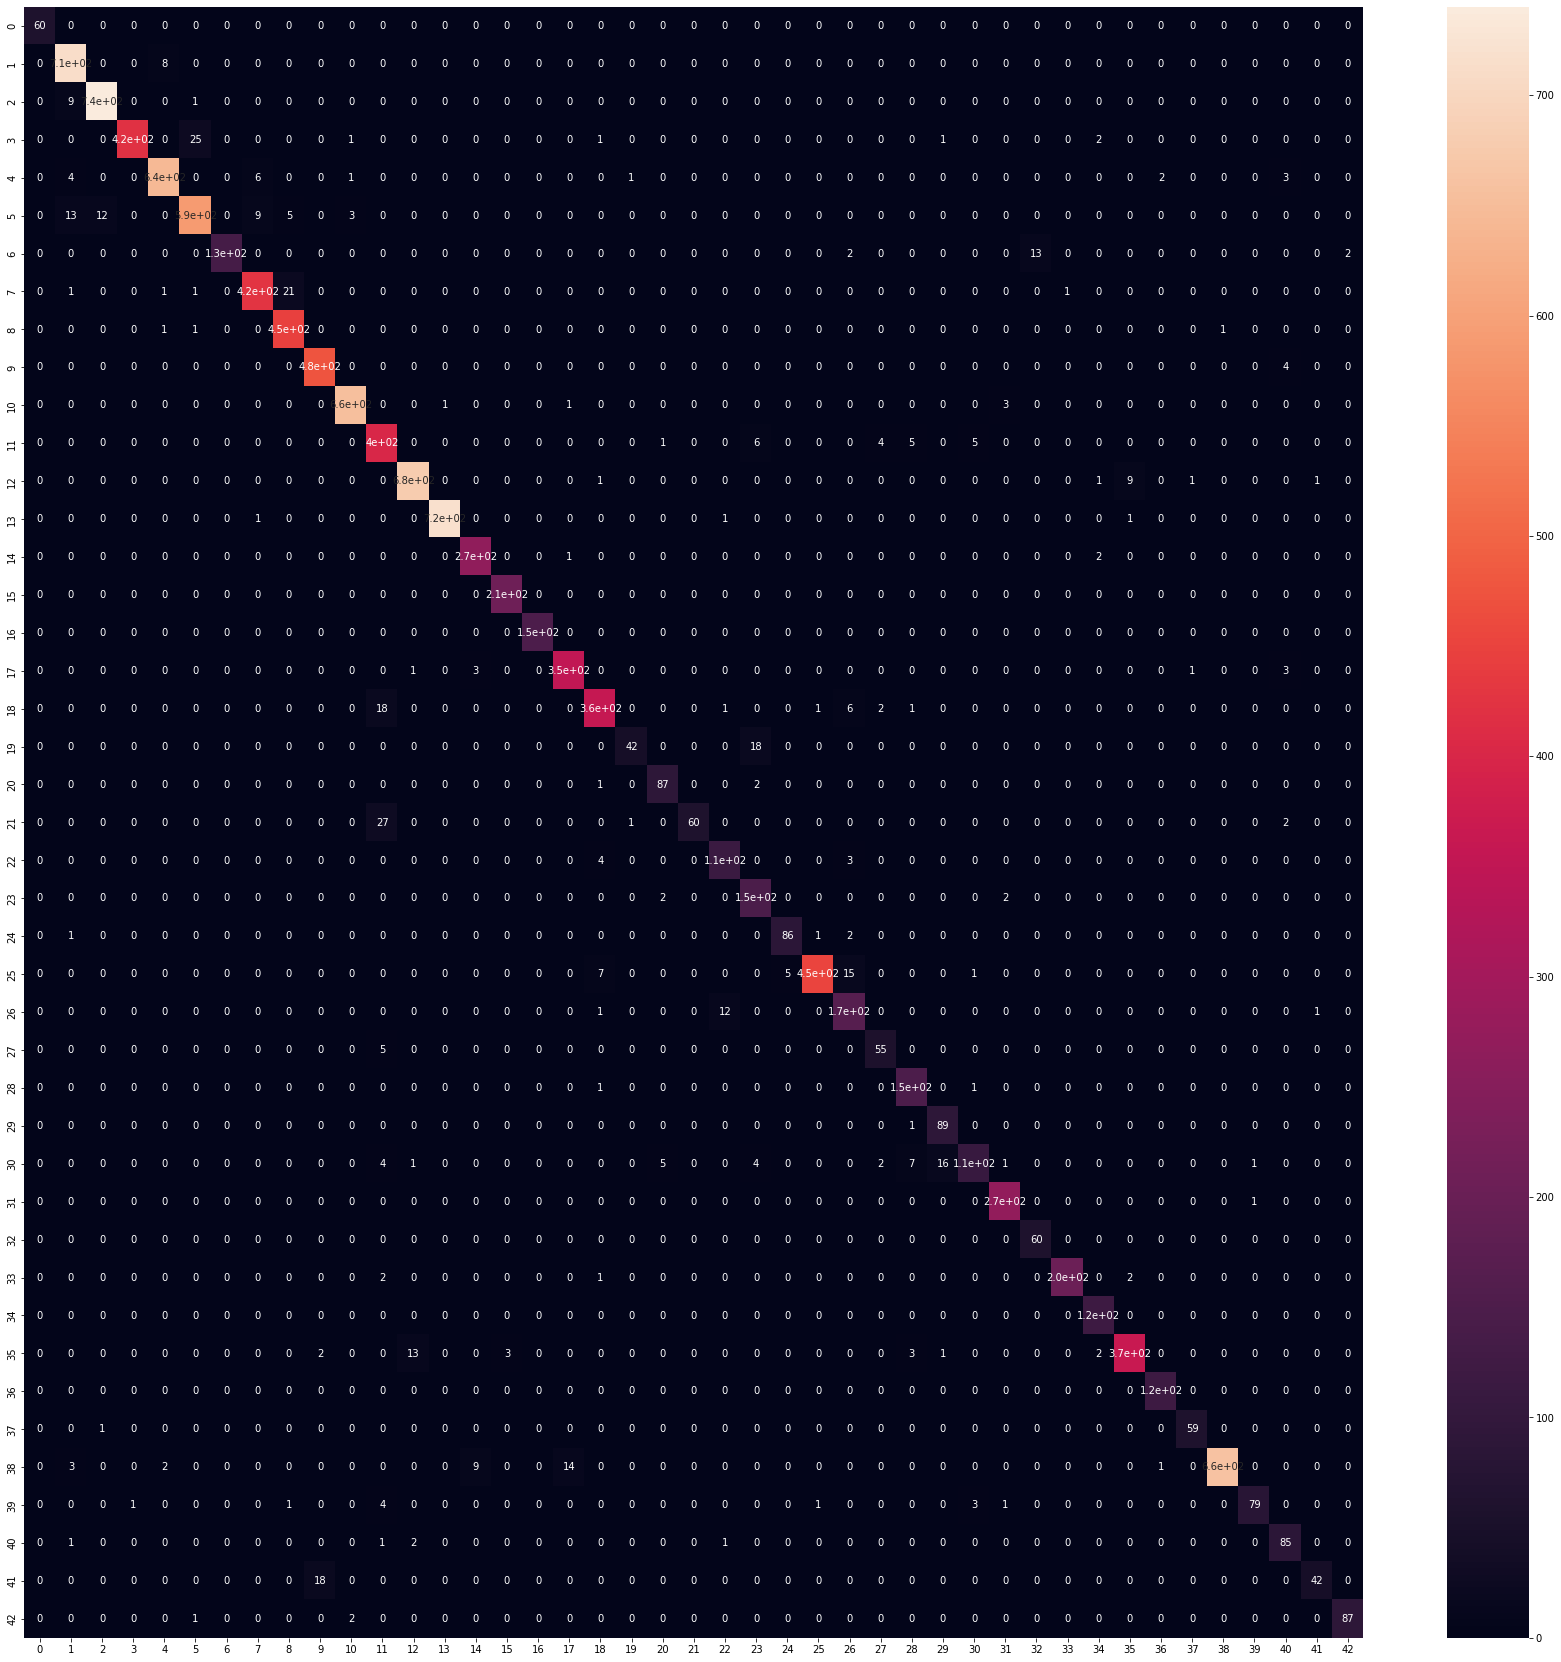

In [137]:
import seaborn as sn
cm2 = cm.copy()
#cm2[cm2 > 100] = -1
plt.figure(figsize = (30,30))
sn.heatmap(cm2, annot=True)

Create a way to get the number of errors per signal, and those who get the highest error, look for images

In [138]:
sum_of_rows = np.sum(cm2, axis = 0)
max_of_rows = np.max(cm2, axis = 0)

In [139]:
# Getting the sum of elements per row
sum_of_rows

array([ 60, 744, 753, 421, 655, 617, 133, 441, 474, 496, 662, 460, 694,
       718, 279, 213, 150, 368, 378,  44,  95,  60, 128, 176,  91, 455,
       194,  63, 165, 107, 119, 276,  73, 206, 127, 378, 123,  61, 662,
        81,  97,  44,  89])

In [140]:
# Getting the numer of maxmum values = diagonal values
max_of_rows

array([ 60, 712, 740, 420, 643, 588, 133, 425, 447, 476, 655, 399, 677,
       717, 267, 210, 150, 352, 361,  42,  87,  60, 113, 146,  86, 452,
       166,  55, 148,  89, 109, 269,  60, 205, 120, 366, 120,  59, 661,
        79,  85,  42,  87])

In [141]:
# Number of missclasifyed per signal
sum_of_rows - max_of_rows

array([ 0, 32, 13,  1, 12, 29,  0, 16, 27, 20,  7, 61, 17,  1, 12,  3,  0,
       16, 17,  2,  8,  0, 15, 30,  5,  3, 28,  8, 17, 18, 10,  7, 13,  1,
        7, 12,  3,  2,  1,  2, 12,  2,  2])

## 8. Test the trained deep CNNs on brand-new images. This might involve collecting traffic sign data and evaluating the system's performance and make adjustment as necessary